In [1]:
import pandas as pd
import numpy as np

import glob
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

from modules.utilities import *
from modules.constants import *

plt.rcParams.update(mpl_params)
TOPIC_DIR = "./Outputs/BERTopic/Topics"

In [2]:
names = []
values = []

for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        count = len(df)
        names.append(topic_map[topic_name])
        values.append(count)

summary_df = pd.DataFrame({
    "Topic": names,
    "Count": values
})

summary_df["Parcent"] = (summary_df["Count"] / (summary_df["Count"].sum()+101)) * 100
summary_df = summary_df.sort_values("Count", ascending=False)

names = summary_df["Topic"].values
values = summary_df["Count"].values
percentages = summary_df["Parcent"].values

In [3]:
summary_df

,Topic,Count,Parcent
46,CI/CD,96,7.862408
47,Transpiler Benchmarking,56,4.586405
44,Rendering and Data Loading,51,4.176904
43,Timeout and Concurrency,43,3.521704
49,Sequence Data Processing,40,3.276003
48,Join Query,35,2.866503
51,Dependency Management,32,2.620803
50,Network Call Optimization,32,2.620803
4,Performance Benchmarking,30,2.457002
3,Memory Leak,28,2.293202


In [4]:
summary_df["Count"].sum()

np.int64(1120)

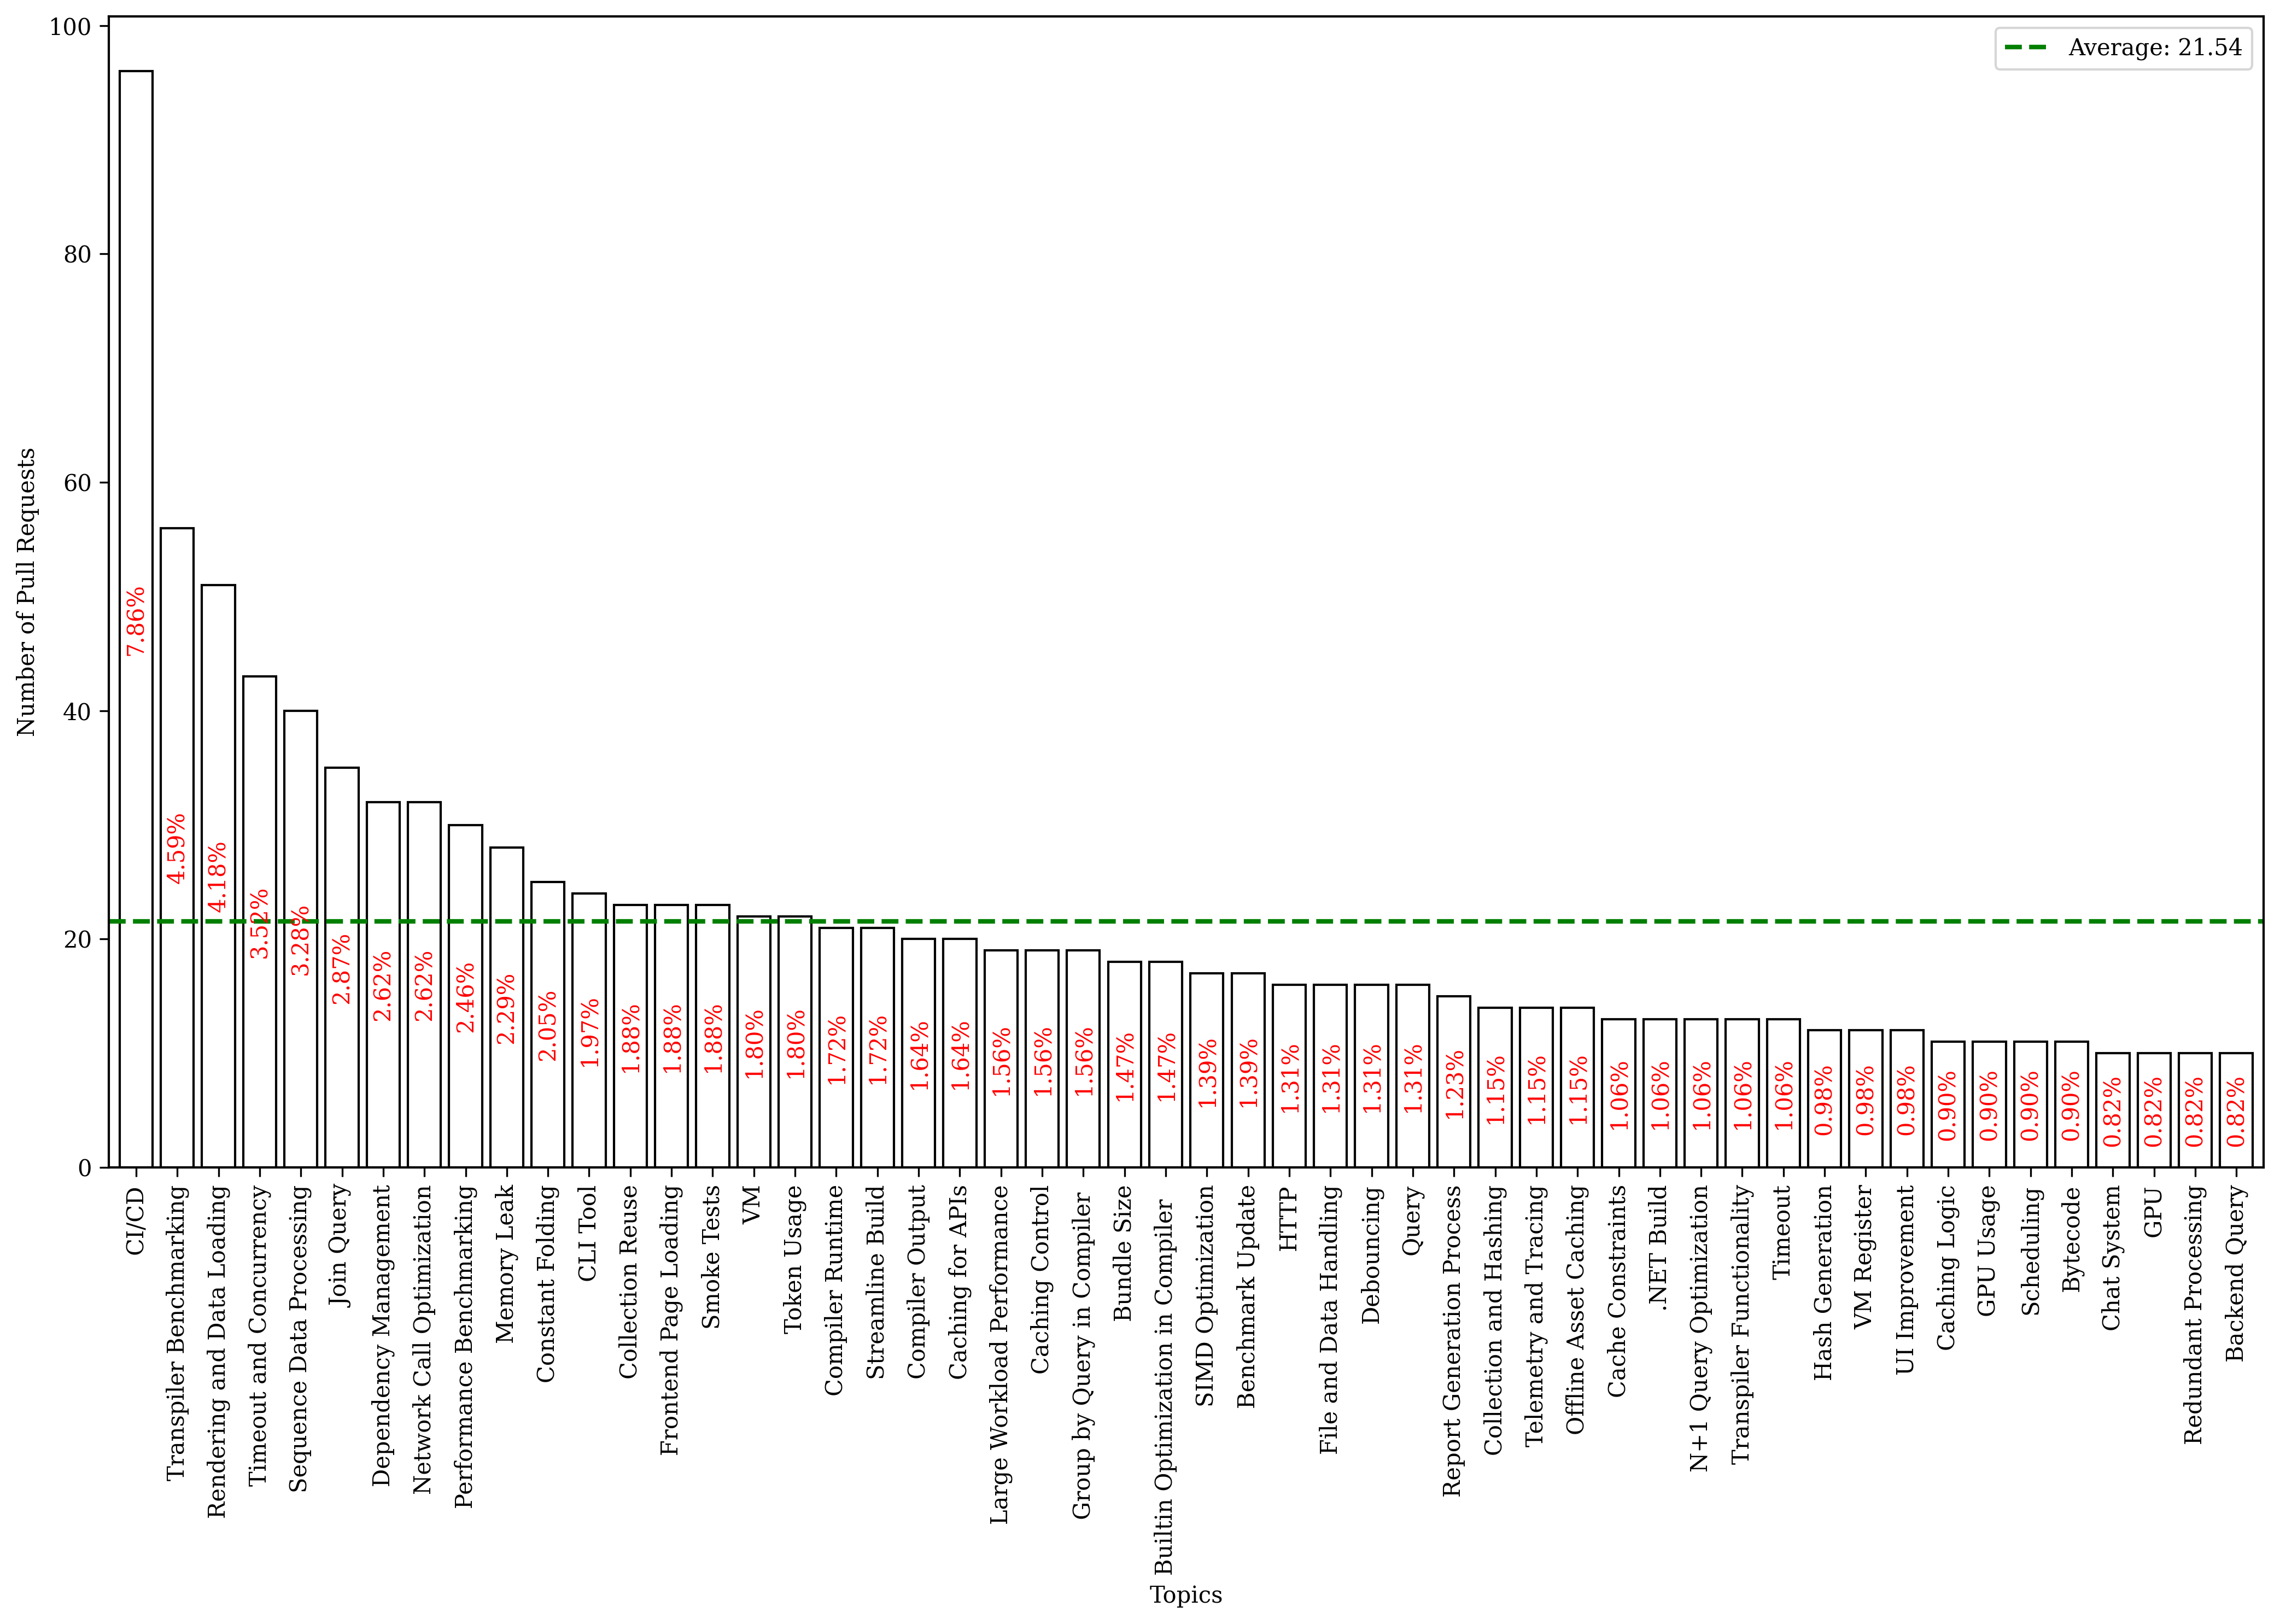

In [5]:
avg_value = np.mean(values)

fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.bar(names, values, color="white", edgecolor="black")

# Add percentage text in the middle of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2.,
            f'{percentage:.2f}%',
            ha='center', va='center', color="red", rotation=90)

ax.axhline(avg_value, color="green", linestyle="--", linewidth=2, label=f"Average: {avg_value:.2f}")
ax.set_ylabel("Number of Pull Requests")
ax.set_xlabel("Topics")
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0.005, tight=True)
plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Topic_Distribution.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [6]:
topics = {}
for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        topics[topic_name] = df
        
categories = {}
for category, topic_list in category_map.items():
    pr_count = 0
    for topic in topic_list:
        df = pd.read_csv(os.path.join(TOPIC_DIR, topic + ".csv"))
        pr_count += len(df)
    categories[category] = pr_count
    

category_df = pd.DataFrame({
    "Category": list(categories.keys()),
    "Count": list(categories.values())
})
category_df["Percent"] = (category_df["Count"] / category_df["Count"].sum()) * 100
category_df = category_df.sort_values("Count", ascending=False)
category_df

,Category,Count,Percent
1,Low-level,257,22.946429
0,Development,222,19.821429
2,UI,136,12.142857
4,Algorithmic,119,10.625000
6,Networking,96,8.571429
3,Caching,87,7.767857
5,Query,61,5.446429
7,Analytics,61,5.446429
8,Hardware,49,4.375000
9,AI,32,2.857143


In [7]:
categories.keys()

dict_keys(['Development', 'Low-level', 'UI', 'Caching', 'Algorithmic', 'Query', 'Networking', 'Analytics', 'Hardware', 'AI'])

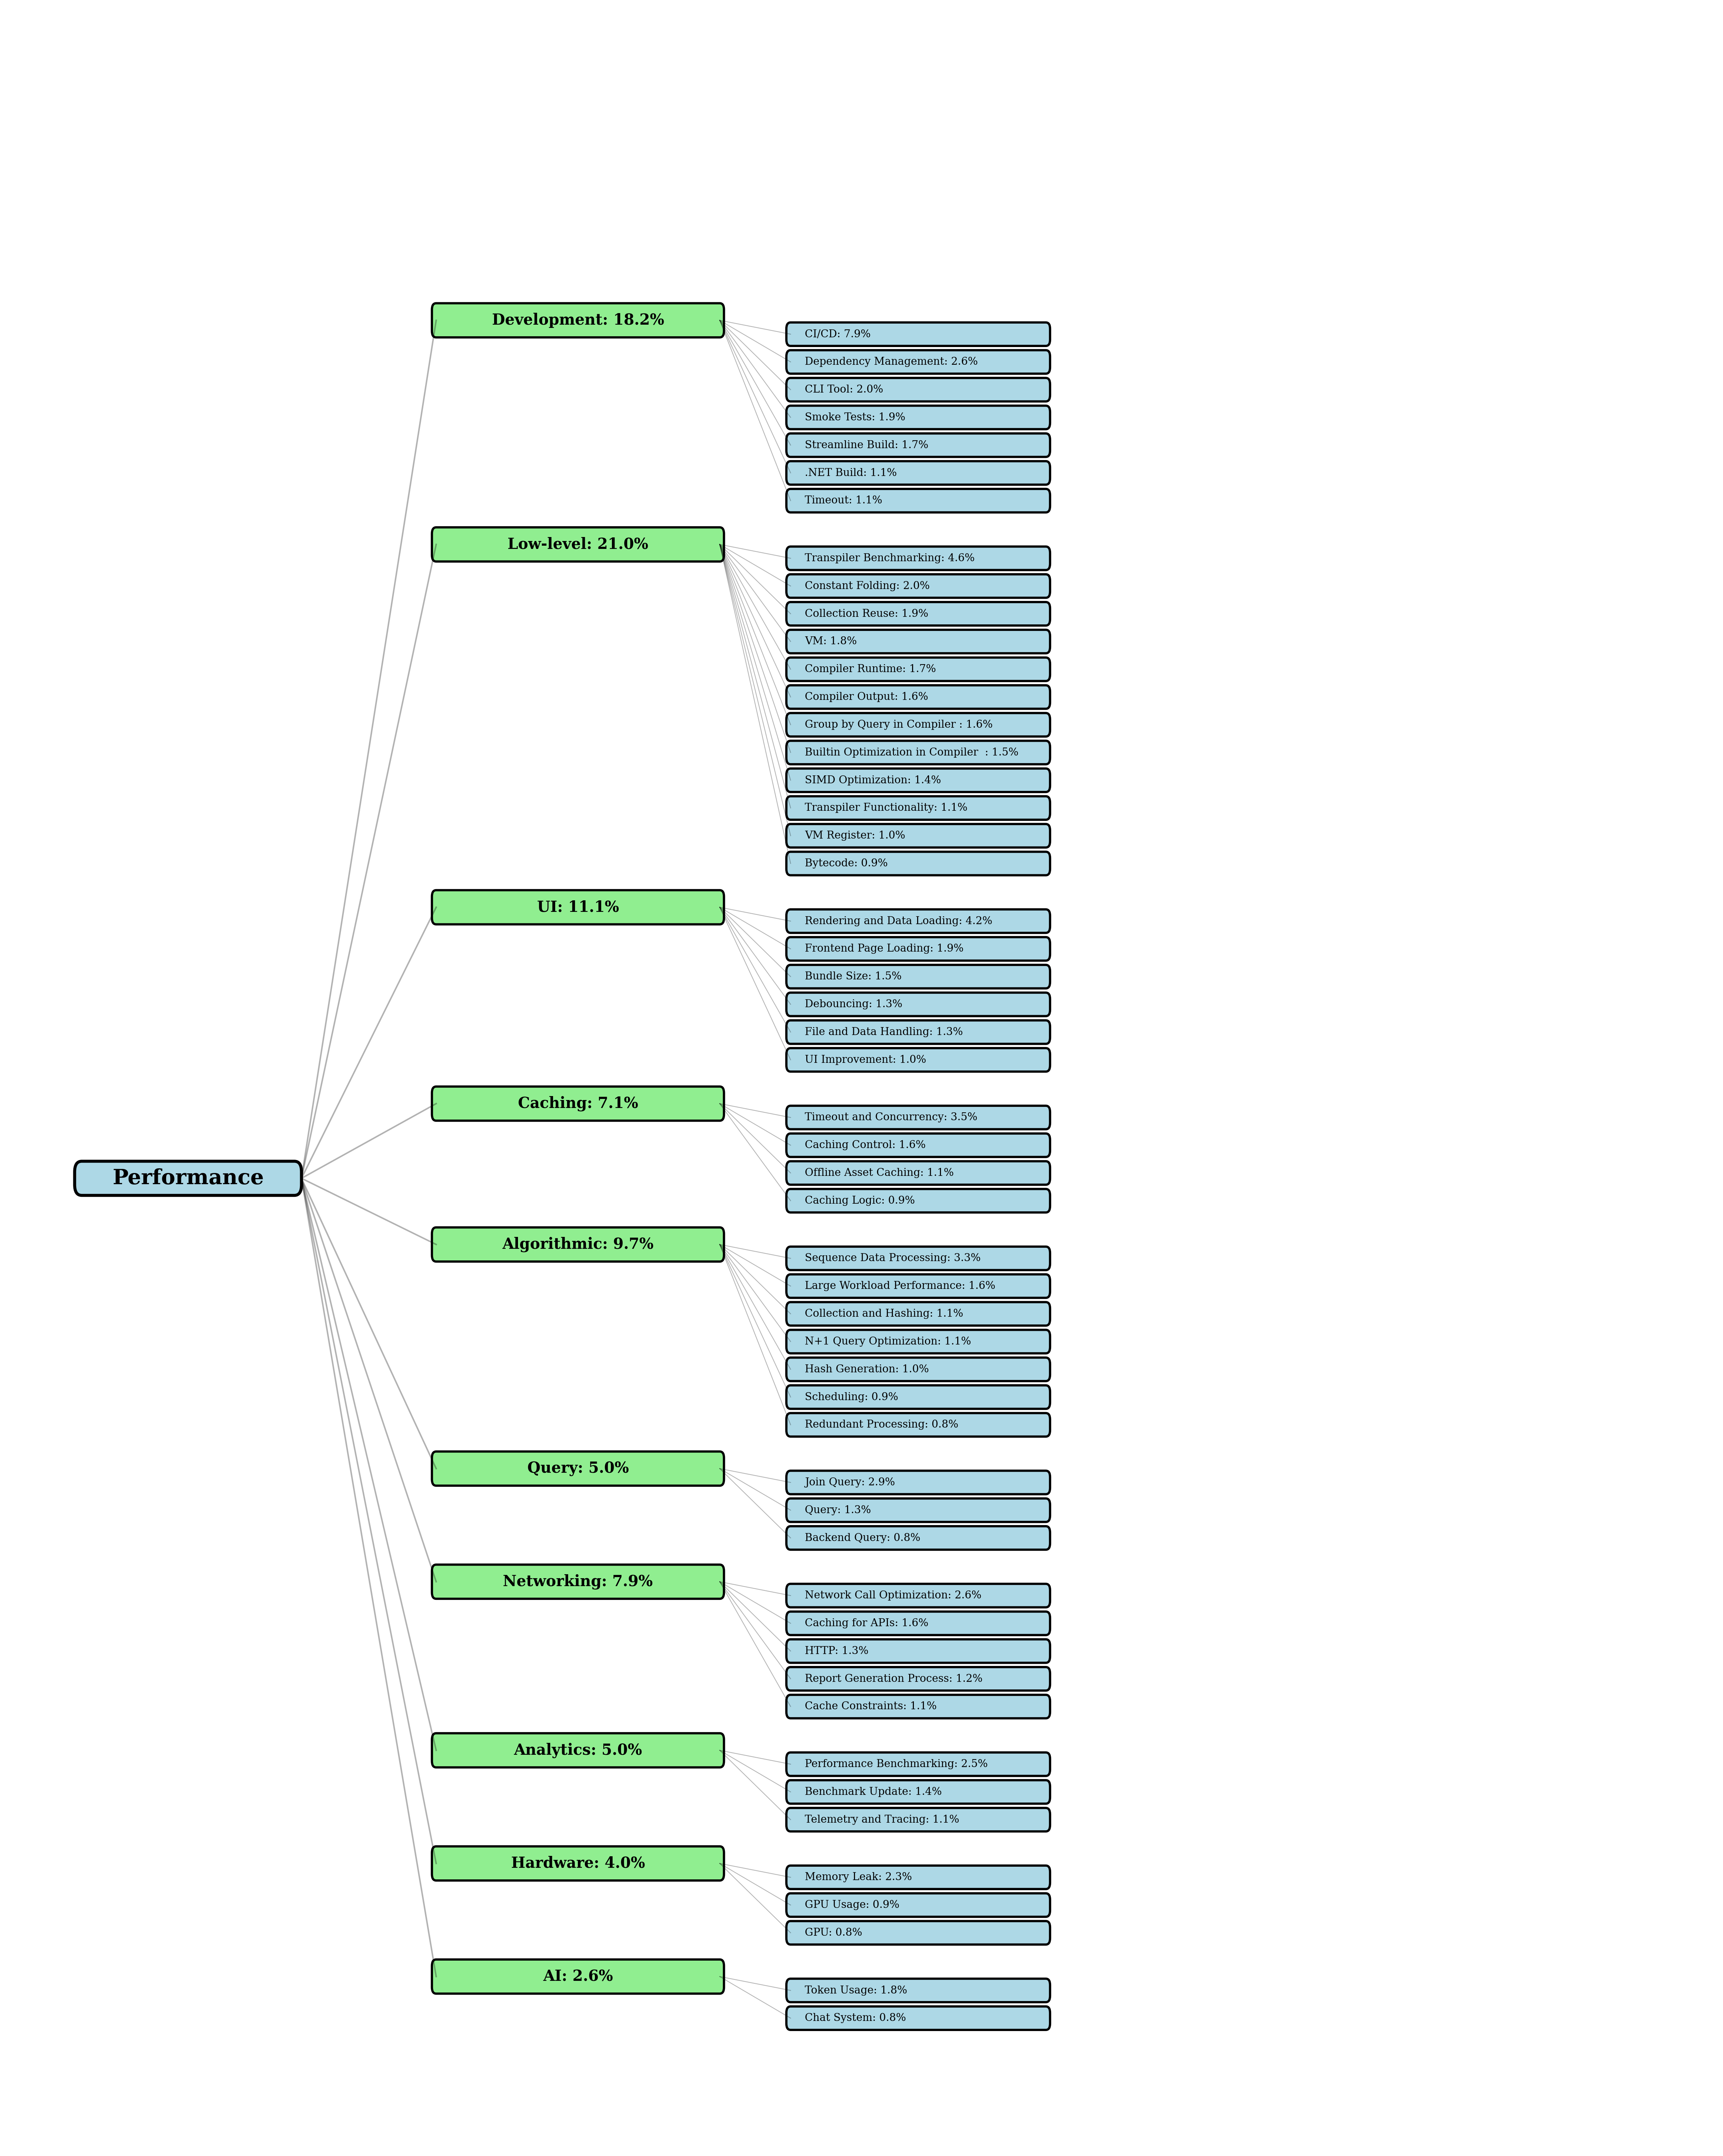

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# =========================
# FIGURE SETUP
# =========================
fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# # =========================
# # TITLE
# # =========================
# ax.text(
#     6, 9.5,
#     'Performance Optimization Hierarchy',
#     ha='center',
#     va='center',
#     fontsize=18,
#     fontweight='bold'
# )

# =========================
# ROOT NODE
# =========================
root_box = FancyBboxPatch(
    (0.5, 4.5),
    1.5,
    0.06,
    boxstyle="round,pad=0.05",
    edgecolor='black',
    facecolor='lightblue',
    linewidth=2
)
ax.add_patch(root_box)

ax.text(
    1.25, 4.53,
    'Performance',
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold'
)

# =========================
# DATA
# =========================
topic_percentages = dict(
    zip(summary_df['Topic'], summary_df['Parcent'])
)

# =========================
# LAYOUT CONSTANTS
# =========================
topic_spacing = 0.13
topic_box_height = 0.05

category_box_height = 0.1
category_topic_gap = 0.04
category_padding = 0.0

cat_x = 3.0
topic_x = 5.5

# =========================
# CALCULATE CATEGORY POSITIONS
# =========================
current_y = 8.5
category_positions = {}

for category, topics in category_map.items():
    n_topics = len(topics)

    required_height = (
        n_topics * topic_spacing
        + category_box_height
        + category_topic_gap
        + category_padding
    )

    category_positions[category] = current_y
    current_y -= required_height

# =========================
# DRAW CATEGORIES AND TOPICS
# =========================
for category, topics in category_map.items():
    cat_y = category_positions[category]

    # ---- Category Box ----
    cat_box = FancyBboxPatch(
        (cat_x, cat_y),
        2,
        category_box_height,
        boxstyle="round,pad=0.03",
        edgecolor='black',
        facecolor='lightgreen',
        linewidth=1.5
    )
    ax.add_patch(cat_box)

    ax.text(
        cat_x + 1.0,
        cat_y + category_box_height / 2,
        category + ": " + f"{categories[category]/(sum(categories.values())+101)*100:.1f}%",
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

    # ---- Root → Category Connector ----
    ax.plot(
        [2.05, cat_x],
        [4.53, cat_y + category_box_height / 2],
        'k-',
        linewidth=1,
        alpha=0.3
    )

    # ---- Topics ----
    topic_start_y = cat_y - category_topic_gap

    for j, topic_key in enumerate(topics):
        topic_name = topic_map[topic_key]
        percentage = topic_percentages.get(topic_name, 0)

        topic_y = topic_start_y - j * topic_spacing

        topic_box = FancyBboxPatch(
            (topic_x, topic_y),
            1.8,
            topic_box_height,
            boxstyle="round,pad=0.03",
            edgecolor='black',
            facecolor='lightblue',
            linewidth=1.5
        )
        ax.add_patch(topic_box)

        # ---- Category → Topic Connector ----
        ax.plot(
            [cat_x + 2.0, topic_x],
            [cat_y + category_box_height / 2,
             topic_y + topic_box_height / 2],
            'k-',
            linewidth=0.5,
            alpha=0.3
        )

        # ---- Topic Label ----
        ax.text(
            topic_x + 0.1,
            topic_y + topic_box_height / 2,
            f'{topic_name}: {percentage:.1f}%',
            ha='left',
            va='center',
            fontsize=7
        )

# =========================
# FINALIZE
# =========================
plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Performance_Optimization_Hierarchy.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()


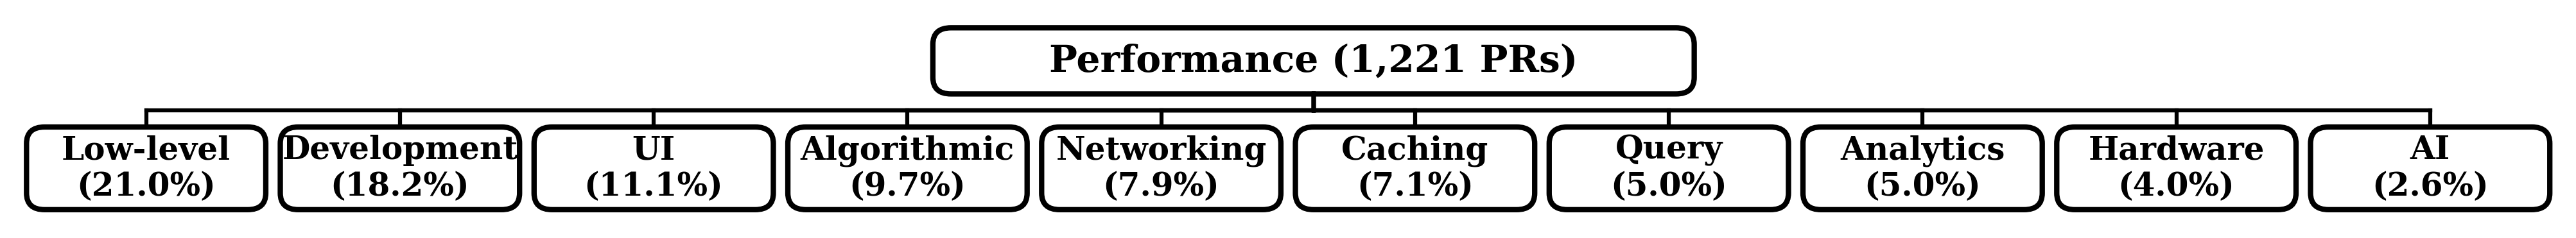

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

# =========================
# FIGURE SETUP
# =========================
fig, ax = plt.subplots(figsize=(17, 1.35))

ax.axis('off')

# =========================
# ROOT NODE - Performance PRs
# =========================
total_prs = sum(categories.values()) + 101 # 101 outliers

root_box = FancyBboxPatch(
    (9, 0.85),
    2,
    0.1,
    boxstyle="round,pad=0.05",
    edgecolor='black',
    facecolor='white',
    linewidth=2
)
ax.add_patch(root_box)

ax.text(
    10, .9,
    f'Performance ({total_prs:,} PRs)',
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold'
)

# =========================
# CATEGORY LEVEL
# =========================
sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
n_categories = len(sorted_categories)

# Layout for categories (arrange in one row)
category_width = 0.56
category_height = 0.15
x_spacing = 0.7

category_positions = {}

# Calculate starting x to center all categories
total_width = n_categories * x_spacing
start_x = (20 - total_width) / 2
cat_y = 0.5

for idx, (category, count) in enumerate(sorted_categories):
    cat_x = start_x + idx * x_spacing
    
    category_positions[category] = (cat_x, cat_y)
    
    # Draw category box
    percentage = (count / total_prs) * 100
    
    cat_box = FancyBboxPatch(
        (cat_x, cat_y),
        category_width,
        category_height,
        boxstyle="round,pad=0.05",
        edgecolor='black',
        facecolor='white',
        linewidth=2
    )
    ax.add_patch(cat_box)
    
    # Category text
    ax.text(
        cat_x + category_width / 2,
        cat_y + category_height / 2,
        f'{category}\n({percentage:.1f}%)',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold'
    )
    
    # Draw square connector from root to category
    root_center_x = 10
    root_bottom_y = 0.8
    cat_center_x = cat_x + category_width / 2
    cat_top_y = cat_y + category_height + 0.05
    
    # Vertical line down from root, then horizontal to category x, then vertical to category
    mid_y = (root_bottom_y + cat_top_y) / 2
    
    ax.plot([root_center_x, root_center_x], [root_bottom_y, mid_y], 'k-', linewidth=1.5)
    ax.plot([root_center_x, cat_center_x], [mid_y, mid_y], 'k-', linewidth=1.5)
    ax.plot([cat_center_x, cat_center_x], [mid_y, cat_top_y], 'k-', linewidth=1.5)

# Set tight x limits to remove empty space
min_x = start_x - 0.07
max_x = start_x + (n_categories - 1) * x_spacing + category_width + 0.07
ax.set_xlim(min_x, max_x)

# plt.tight_layout()
plt.savefig("./Outputs/Figures/RQ1_Performance_PR_Tree.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [10]:
topics = {}
for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        topics[topic_name] = df
        
category_dfs = {}
for category, topic_list in category_map.items():
    dfs_to_concat = []
    for topic in topic_list:
        df = topics[topic].copy()
        df['topic_name'] = topic_map.get(topic, topic)
        df['category'] = category
        dfs_to_concat.append(df)
    
    if dfs_to_concat:
        category_dfs[category] = pd.concat(dfs_to_concat, ignore_index=True)

total = 0
for category, df in category_dfs.items():
    total += len(df)
    print(f"{category}: {len(df)} PRs")
print(f"Total PRs across all categories: {total}")


Development: 222 PRs
Low-level: 257 PRs
UI: 136 PRs
Caching: 87 PRs
Algorithmic: 119 PRs
Query: 61 PRs
Networking: 96 PRs
Analytics: 61 PRs
Hardware: 49 PRs
AI: 32 PRs
Total PRs across all categories: 1120


In [11]:
all_categories_df = pd.concat(category_dfs.values(), ignore_index=True)
all_categories_df

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,Topic,Probability,Representative_document,topic_name,category
0,2912546402,448,Add GitHub API caching to prevent rate limiting,- Create GitHub API caching script that handle...,Claude_Code,1021104,8enmann,closed,2025-03-12T03:51:34Z,2025-05-06T17:50:00Z,NaN,937253475,https://api.github.com/repos/anthropics/claude...,https://github.com/anthropics/claude-code/pull...,0,1.0,False,CI/CD,Development
1,3216159293,110,Add vcpkg dependency caching to Windows CI wor...,## Overview\n\nThis PR implements vcpkg depend...,Copilot,198982749,Copilot,closed,2025-07-09T14:30:39Z,2025-07-09T16:47:00Z,2025-07-09T16:47:00Z,564439013,https://api.github.com/repos/pelicanmapping/rocky,https://github.com/pelicanmapping/rocky/pull/110,0,1.0,False,CI/CD,Development
2,3195588879,16531,Remove duplicate yarn eslint step from .circle...,<details><summary>&#x1F6E0 DevTools &#x1F6E0</...,Copilot,198982749,Copilot,closed,2025-07-02T11:33:06Z,2025-07-02T12:24:50Z,2025-07-02T12:24:50Z,136202695,https://api.github.com/repos/mlflow/mlflow,https://github.com/mlflow/mlflow/pull/16531,0,1.0,False,CI/CD,Development
3,3074681764,13829,Update build documentation with quick build op...,This PR updates the build documentation (`tool...,Copilot,198982749,Copilot,open,2025-05-19T18:25:04Z,NaN,NaN,281765424,https://api.github.com/repos/microsoft/azurelinux,https://github.com/microsoft/azurelinux/pull/1...,0,1.0,False,CI/CD,Development
4,3159826481,184,[WIP] Support .coshrc compilation,Thanks for assigning this issue to me. I'm sta...,Copilot,198982749,Copilot,closed,2025-06-19T10:34:39Z,2025-06-26T11:59:32Z,NaN,445862991,https://api.github.com/repos/tomhrr/cosh,https://github.com/tomhrr/cosh/pull/184,0,1.0,False,CI/CD,Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,3144466175,4,Implement local storage persistence,"A new persistence utility, `src/lib/persistenc...",Cursor,56125930,f1shy-dev,closed,2025-06-13T18:49:45Z,2025-06-13T18:49:52Z,2025-06-13T18:49:52Z,998301272,https://api.github.com/repos/intern3-chat/inte...,https://github.com/intern3-chat/intern3-chat/p...,48,1.0,False,Chat System,AI
1116,3275952470,2777,fix: update schemaDesignTool to directly updat...,## Issue\n\n- resolve: Root cause issue where ...,Devin,158243242,devin-ai-integration[bot],open,2025-07-30T07:15:24Z,NaN,NaN,839216423,https://api.github.com/repos/liam-hq/liam,https://github.com/liam-hq/liam/pull/2777,48,1.0,True,Chat System,AI
1117,3074294403,320,Integrate chatAudioIO module,# Integrate chatAudioIO module\n\nThis PR inte...,Devin,158243242,devin-ai-integration[bot],closed,2025-05-19T15:42:40Z,2025-05-28T14:33:26Z,NaN,374381865,https://api.github.com/repos/stack-chan/stack-...,https://github.com/stack-chan/stack-chan/pull/320,48,1.0,False,Chat System,AI
1118,3058809612,1399,Fix: Cache system info to prevent re-fetching ...,# Cache System Info to Prevent Re-fetching on ...,Devin,158243242,devin-ai-integration[bot],closed,2025-05-13T05:33:38Z,2025-05-13T07:32:44Z,NaN,575321313,https://api.github.com/repos/langbot-app/LangBot,https://github.com/langbot-app/LangBot/pull/1399,48,1.0,False,Chat System,AI


In [12]:
fig = go.Figure()

i = 1
for agent in sorted(all_categories_df['agent'].unique()):
    sub = all_categories_df[all_categories_df["agent"] == agent]
    cat_groups = sub.groupby("category")['id'].nunique().reset_index(name="count").sort_values(by="category", ascending=True)
      
    categories = []
    counts = []

    for cat in sorted(category_map.keys()):
        if cat not in cat_groups['category'].values:
            categories.append(cat)
            counts.append(0)
        else:
            cat_count = cat_groups[cat_groups['category'] == cat]['count'].values[0]
            categories.append(cat)
            
            total = all_categories_df[all_categories_df["category"] == cat]['id'].nunique()
            counts.append(cat_count/total * 100)
        

    fig.add_trace(go.Scatterpolar(
        r=counts,
        theta=categories,
        fill='none',
        line=dict(
                color=COLOR_MAP[agent],
                width=3
            ),
        marker=dict(
            size=7,
            symbol=MARKER_MAP[agent],
        ),
        name=agent,
    ))

    i += 1



fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),

    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.05,          # pulls legend closer to plot
        xanchor="center",
        x=0.5
    ),

    margin=dict(
        l=0,
        r=0,
        t=30,
        b=40              # just enough for legend
    ),

    showlegend=True
)

fig.show()
fig.write_image("./Outputs/Figures/RQ1_Agent_Performance_Comparison.pdf", scale=20, format="pdf")